In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NW_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	12
float64		column 2	9
float64		column 3	9
float64		column 4	3
float64		column 5	6
float64		column 6	3
float64		column 7	6
int64		column 8	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,756.000000,759.000000,759.000000,765.000000,762.000000,765.000000,762.000000,768.000000
mean,3.870370,121.018445,69.111989,20.529412,80.187664,31.992288,0.473438,33.240885
std,3.372522,31.854380,19.433721,15.949962,115.528951,7.885822,0.331917,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,63.000000,0.000000,0.000000,27.300000,0.244000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.000000,0.375500,29.000000
75%,6.000000,140.500000,80.000000,32.000000,127.750000,36.600000,0.628500,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

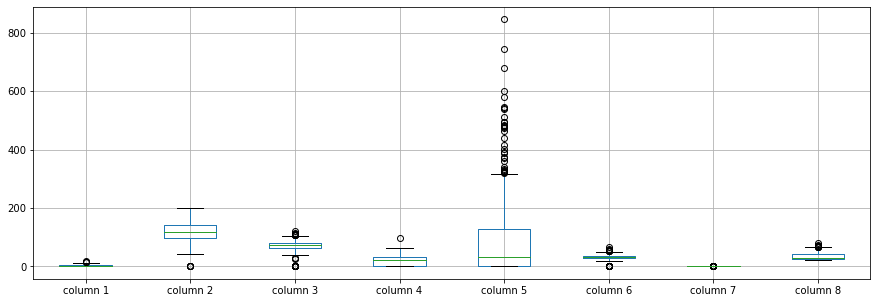

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.870370
column 2    121.018445
column 3     69.111989
column 4     20.529412
column 5     80.187664
column 6     31.992288
column 7      0.473438
column 8     33.240885
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.125216,0.139031,-0.078543,-0.068563,0.020366,-0.040809,0.541638
column 2,0.125216,1.000000,0.153435,0.063318,0.331676,0.223963,0.138232,0.255107
column 3,0.139031,0.153435,1.000000,0.211877,0.088229,0.281209,0.047645,0.238097
column 4,-0.078543,0.063318,0.211877,1.000000,0.437638,0.392367,0.181442,-0.113599
column 5,-0.068563,0.331676,0.088229,0.437638,1.000000,0.196663,0.180933,-0.041024
column 6,0.020366,0.223963,0.281209,0.392367,0.196663,1.000000,0.138597,0.039913
column 7,-0.040809,0.138232,0.047645,0.181442,0.180933,0.138597,1.000000,0.031714
column 8,0.541638,0.255107,0.238097,-0.113599,-0.041024,0.039913,0.031714,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+45,8+45+45,8+45+45+45,8+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45+45+45,8+45+45+45+45+45,8+45+45+45+45,8+45+45+45,8+45+45,8+45,8], vae_layer = False, seed = 8)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 427.1919193267822
Epoch: 1 , loss: 425.98518562316895
Epoch: 2 , loss: 424.1957149505615
Epoch: 3 , loss: 422.53728103637695
Epoch: 4 , loss: 419.6798273722331
Epoch: 5 , loss: 417.40389188130695
Epoch: 6 , loss: 415.4149862925212
Epoch: 7 , loss: 410.8445046742757
Epoch: 8 , loss: 407.93497403462726
Epoch: 9 , loss: 400.61220932006836
Epoch: 10 , loss: 398.51649792989093
Epoch: 11 , loss: 387.3425045013428
Epoch: 12 , loss: 386.08798535664874
Epoch: 13 , loss: 381.4967632293701
Epoch: 14 , loss: 370.6153507232666
Epoch: 15 , loss: 367.37128257751465
Epoch: 16 , loss: 355.5839201609294
Epoch: 17 , loss: 360.8059825897217
Epoch: 18 , loss: 353.3863118489583
Epoch: 19 , loss: 347.2394793828328
Epoch: 20 , loss: 335.04527950286865
Epoch: 21 , loss: 339.8264865875244
Epoch: 22 , loss: 330.55814933776855
Epoch: 23 , loss: 326.51584339141846
Epoch: 24 , loss: 323.1958173116048
Epoch: 25 , loss: 329.9810600280

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(324.7892169358918, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.0562252107381305

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30
766,1.0,126.0,60.0,0.0,0.0,30.1,0.349,47


In [20]:
imputations[-1].to_excel("PID_NW_1.xlsx", index=False, header=False)